# Čistenie a predspracovanie dát

### Róbert Móro, Jakub Ševcech

IAU, 30.10.2019

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w06

## Pýtať sa môžete na http://slido.com#iau2019-w06

# Osnova

## Príklad otázky na témy z predchádzajúceho týždňa

## Krátka ukážka vyčistenia dát

## Základné úlohy čistenia dát

1. ### Chýbajúce hodnoty

2.  ### Vychýlené hodnoty

3.  ### Normalizácia údajov

4. ### Transformácia typu dát

> #### Numerické atribúty na kategorické

> ####  Kategorické atribúty na numerické

# Príklad otázky na témy z predchádzajúceho týždňa

Ktoré z nasledovných tvrdení sú pravdivé?

* Ak je p-hodnota menšia ako akceptovateľná pravdepodobnosť chyby 1. rádu, zamietame nulovú hypotézu.
* Nulová hypotéza pri t-teste hovorí, že priemery testovaných rozdelení sú rôzne.
* Ak nám pri t-teste vyjde p-hodnota > 0,05, dokázali sme, že platí nulová hypotéza.

# Prečo čistenie dát?
## Real world data are generally
* Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
* Noisy: containing errors or outliers
* Inconsistent: containing discrepancies in codes or names

## Tasks in data preprocessing
* Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies. **(dnes)**
* Data integration: using multiple databases, data cubes, or files. **(pred dvoma týždňami)**
* Data transformation: normalization and aggregation. **(dnes)**
* Data reduction: reducing the volume but producing the same or similar analytical results. **(nabudúce)**
* Data discretization: part of data reduction, replacing numerical attributes with nominal ones. **(dnes)**
> niekdy potrebne aj naopak nominal => numerical

(zdroj: [http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html](http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html))

Na predspracovanie odporúčame využiť knižnicu `scikit-learn`. Možnosti, ktoré na predspracovanie ponúka, nájdete tu: http://scikit-learn.org/stable/modules/preprocessing.html

Vyčerpávajúci zoznam množstva ďalších vecí, čo sa dajú robiť na prípravu dát a na feature engineering nájdete tu: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Pekne spracované je predspracovanie a čistenie dát aj tu (akurát s príkladmi v R, nie pythone): https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf Zaujímavá je hlavne časť k chýbajúcim a vychýleným hodnotám.

Veľmi pekný text opisujúci očakávania na vyčistené dáta [tu](https://github.com/jtleek/datasharing)

# Ukážka čistenia malého datasetu

Čistenie dát je veľmi exploratívna a iteratívna úloha. Nikdy neviete na čo narazíte.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['font.family'] = 'DejaVu Sans' # Tento riadok je tu len na nastavenie pekneho fontu. Ak by vam to na nom padalo, tak ho pokojne zakomentujte. Padat to moze aj neskor pri pokusoch o vykreslovanie obrazkov
from IPython.display import Image

Máme náš dobre známy datset kvetiniek Iris, ale je trochu spotvorený. Skúsme si ho popozerať a pokúsme sa ho opraviť.

In [26]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Takže vidíme, že sú tam nejaké chýbajúce hodnoty

In [28]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Z tohoto vidíme nejaké základné štatistiky, ale zatiaľ nič podozrivé. Znova vidíme chýbajúce hodnoty, ale to sme už vedeli

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


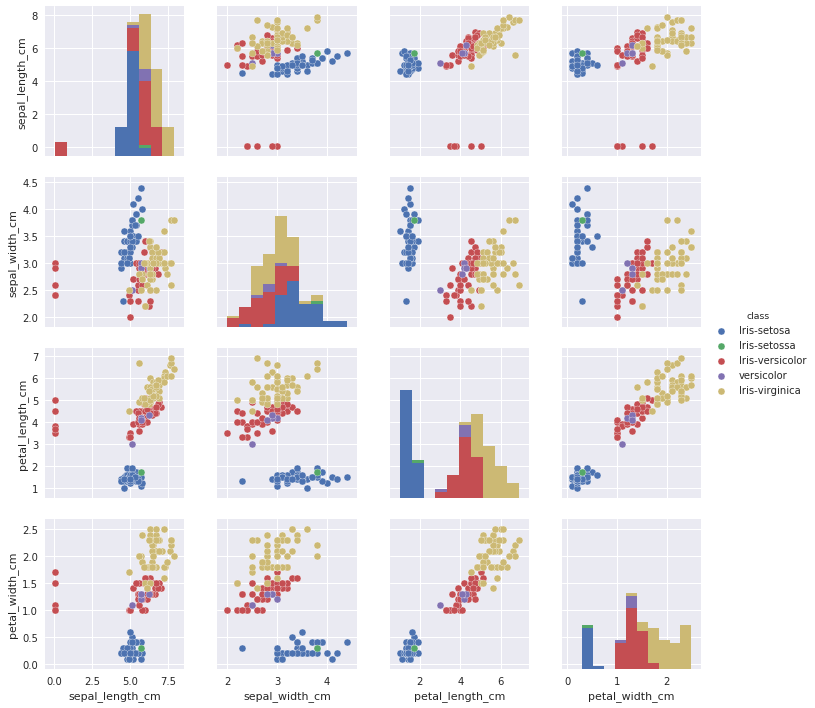

In [29]:
seaborn.pairplot(iris_data, hue='class')

Dostali sme kopec varovaní o chybnej hodnote. To je spôsobené tými chýbajúcimi hodnotami. Pre jednoduchosť ich zatiaľ vyhoďme. 

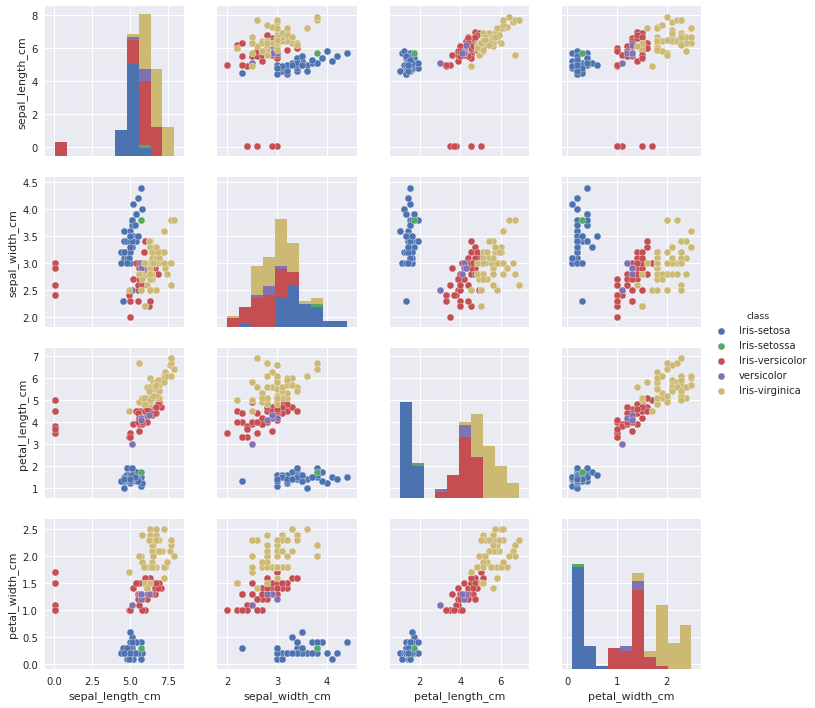

In [30]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Tu už začíname vidieť nejaké divné veci. Z toho, čo už vieme o tých dátach, tak by tam mali byt len 3 triedy. Zdá sa, že sú tam nejaké preklepy v názvoch.

In [31]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

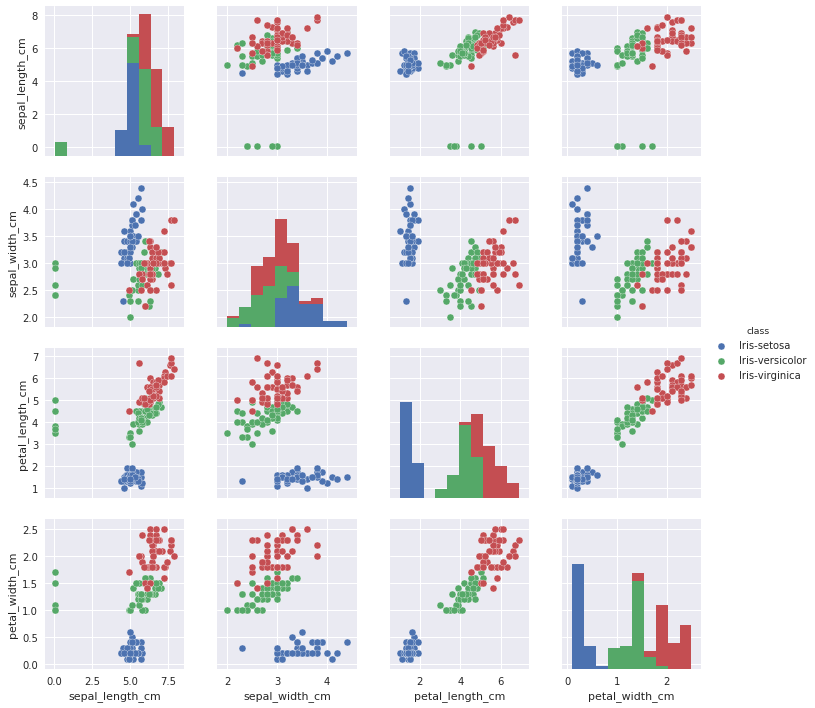

In [32]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Čo tam vidíme ďalej sú nejaké divné osamotené hodnoty *sepal_length_cm* pre Iris-versicolor

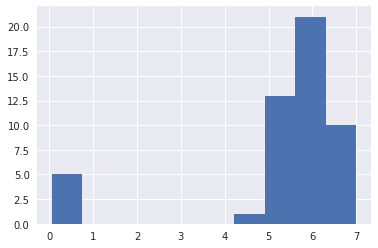

In [33]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

V histograme sú dosť mimo

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


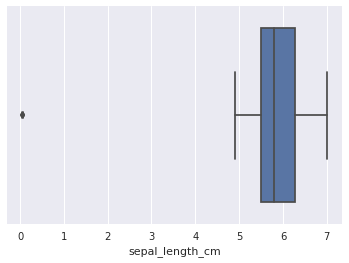

In [34]:
seaborn.boxplot(iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'])

Aj boxplot mi naznačuje, že by to mohli byť nejaký outliery.

Čo s nimi? Nejaké návrhy?

Poďme sa na ne najskôr pozrieť

In [35]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 ), 'sepal_length_cm']

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

In [36]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1 ), 'sepal_length_cm']

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length_cm, dtype: float64

Zdá sa, že len niekto omylom zapísal veľkosť v metroch a nie v cm

In [37]:
mask = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 )

iris_data.loc[mask, 'sepal_length_cm'] = iris_data.loc[mask, 'sepal_length_cm'] * 100

In [38]:
iris_data.loc[mask, 'sepal_length_cm']

77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
Name: sepal_length_cm, dtype: float64

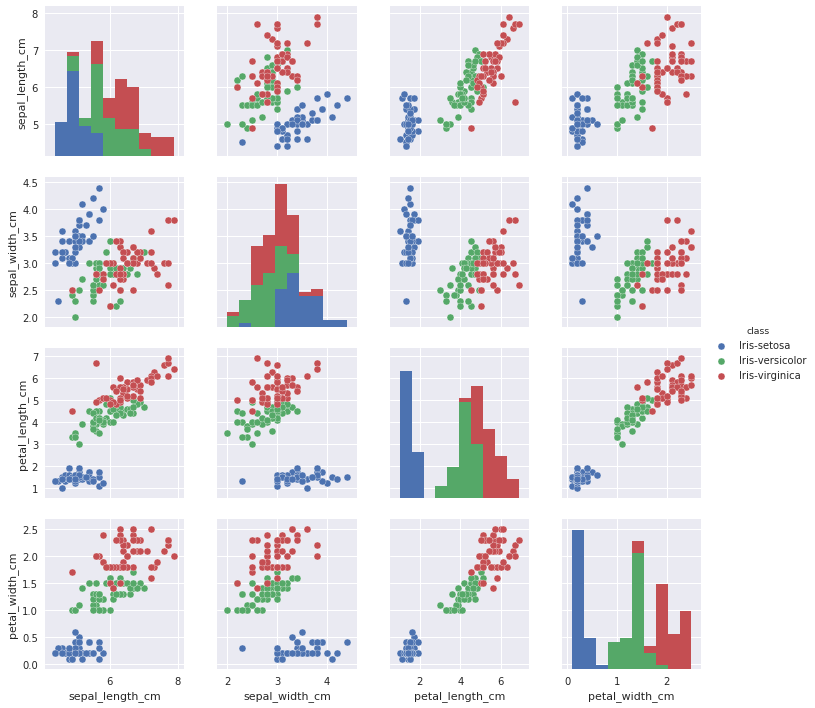

In [39]:
seaborn.pairplot(iris_data.dropna(), hue='class')

## Skúsme sa pozrieť ešte na tie chýbajúce hodnoty

In [42]:
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


Všetko sú to hodnoty z jedného atribútu a z jednej triedy.

Ako by mali tie hodnoty vyzerať?

Pozrime sa ako vyzerajú existujúce hodnoty

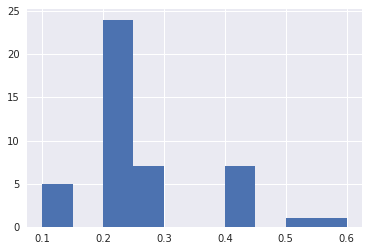

In [43]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

Tie hodnoty sú cca okolo nejakej najčastejšej hodnoty. Môžeme skúsiť nahradiť tie chýbajúce priemernou hodnotou. Alebo možno mediánom.

In [44]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
average_petal_width

0.25111111111111106

In [46]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

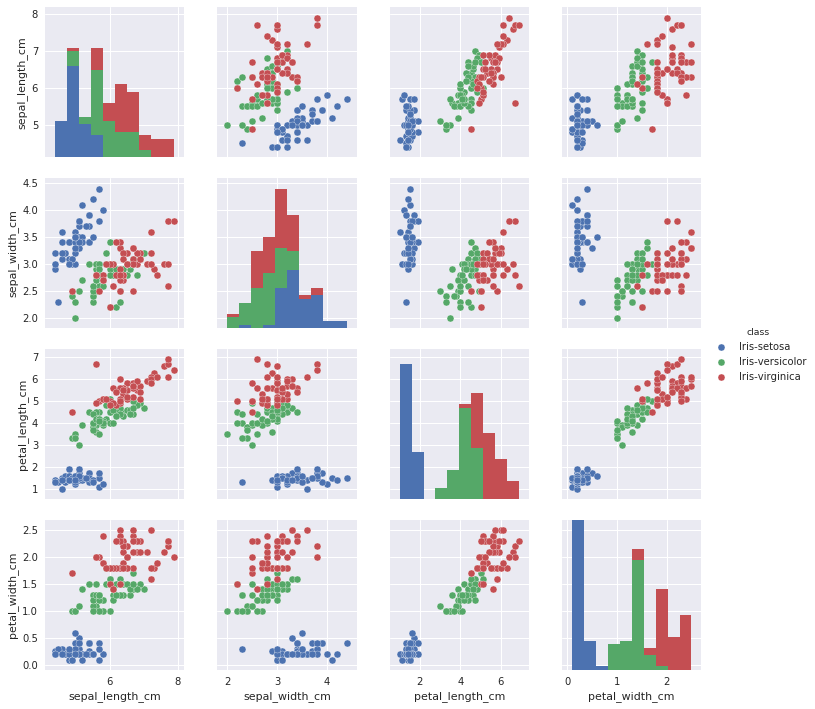

In [47]:
seaborn.pairplot(iris_data, hue='class')

Predchádzajúce nahrádzanie som naschvál napísal ako drevorubač aby ste videli čo sa tam vlastne deje. Existuje aj elegantnejší zápis. Objekt Imputer

In [50]:
from sklearn.preprocessing import Imputer

Znova si teda načítam tie dáta

In [61]:
iris_data_cpy = pd.read_csv('data/iris-data.csv')
nan_map = iris_data_cpy.isnull().any(axis=1)
iris_data_cpy[nan_map]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


A doplním chýbajúce hodnoty

In [267]:
imp = Imputer(missing_values='NaN', strategy='mean')
 
iris_data_cpy['petal_width_cm'] = imp.fit_transform(iris_data_cpy[['petal_width_cm']])
iris_data_cpy[nan_map]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,1.3,Iris-setosa
8,4.4,2.9,1.4,1.3,Iris-setosa
9,4.9,3.1,1.5,1.3,Iris-setosa
10,5.4,3.7,1.5,1.3,Iris-setosa
11,4.8,3.4,1.6,1.3,Iris-setosa


In [64]:
# Ake su dalsie strategie nahradzania hodnot?
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)
 |      The axis along which to i

Metoda fit_transform najskôr natrénuje hodnotu, ktorou sa bude nahrádzať a potom ju použije pri transformácii.

Existujú aj oddelené metódy fit a transform. 
Veľmi dôležité pri práci s trénovacou a testovacou sadou dat. Nad testovacou by ste **nikdy** nemali púšťať fit ani fit_transform. Vždy len transform. **Transformácia sa vždy trénujete na trénovacích dátach a na testovacích ich už len používate.**

# Chýbajúce hodnoty

Aby sme vedeli niečo spraviť s chýbajúcimi hodnotami, tak najskôr potrebujeme pochopiť mechanizmus vzniku chýbajúcich hodnôt. To zistíme buď z dát, opýtaním sa ako boli dáta zbierané alebo hlbším pochopením procesu vzniku datasetu.

1. Missing Completely at Random (MCAR)
> Proces vzniku chýbajúcich hodnôt nezaleží od hodnôt ani nameraných a ani nenameraných. Nieje tam žiadna konzistentná odchýlka.
2. Missing at Random (MAR)
> Zaleží na nameraných dátach ale nie na tých chýbajúcich
3. Missing Not at Random (MNAR)
> Žiadne z predchádzajúcich. Záleží na hodnote chýbajúcich dát. 

Zoznam je v poradí stúpajúcej závažnosti

(Ďalšie info: [https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87))

# Dajme si príklad na dátach o príjme nejakej populácie. 
## 1. Missing Completely at Random (MCAR)
> Proces vzniku chýbajúcich hodnôt nezáleží od hodnôt ani nameraných a ani nenameraných.

Niektoré náhodné dotazníky boli v procese zbierania stratené alebo poškodené. 



## 2. Missing at Random (MAR)
> Zaleží na nameraných dátach ale nie na tých chýbajúcich

* Príklad 1: Jeden z dobrovoľníkov, ktorý dáta zbieral ich zopár náhodne stratil / zahodil / ukradli mu ich / zjedol mu ich pes .... **Do dát si značíme kto dáta zbieral.**
* Príklad 2: **Zbierame aj informáciu o zamestnaní.** Ľudia na manažérskych pozíciách majú väčšiu pravdepodobnosť, že nám nebudú chcieť prezradiť plat.

Proces vzniku chýb je náhodný v rámci podskupín (konkrétny zberač dát, nejaká skupina obyvateľstva)

# Survivorship bias

<img src="img/Survivorship-bias.png" alt="Survivorship bias" style="width: 500px; margin-left: auto; margin-right: auto;"/>

[https://en.wikipedia.org/wiki/Survivorship_bias](https://en.wikipedia.org/wiki/Survivorship_bias)

## 3. Missing Not at Random (MNAR)
> Zaleží na hodnote chýbajúcich dát. 

* Ľudia, ktorí zarábajú menej ako 600 eur mesačne sa častejšie hanbia priznať svoj plat.
* Na mieste kde oslovujeme stretávame len nevyváženú podskupinu obyvateľstva" zbierame na malej dedine počas pracovnej doby a stretávame len dôchodcov a nezamestnaných vs. zbierame pred veľkou IT firmou kde bývajú platy vysoké. 

Proces vzniku nie je náhodný. Záleží od samotnej chýbajúcej hodnoty alebo inej hodnoty, ktorú nezbierame.
**Pozor** do dát sa nám dostáva systematická chyba. Častokrát sa ale o nej nemáme ako dozvedieť. Ak sa o nej dozvieme, tak sa musíme snažiť ju napraviť. Obvykle musíme zbierať dáta odznova. 

# Opravovanie chýbajúcich hodnôt

Vieme len pre MCAR a MAR.

Pre MNAR vo všeobecnosti nevieme opraviť po ukončení zbierania dát. Nevieme ako veľmi sa nám tam prejavila systematická chyba a nevieme to ani dodatočne zistiť, keďže dáta na základe ktorých by sme to zistili sú práve tie, ktoré nám chýbajú.

# Stratégie nahrádzania chýbajúcich hodnôt

Viaceré stratégie. Medzi najčastejšie patria nahrádzanie:

* mediánom (numerické dáta)
* priemerom (numerické dáta)
* najfrekventovanejšou hodnotou (diskrétne dáta)
* predchádzajúcimi metódami v rámci podmnožiny / segmentu definovanom korelovaným atribútom (MAR)
* algoritmus k-najbližších susedov (KNN) - nájdenie podobných pozorovaní pomocou známych atribútov a doplnenie chýbajúcej hodnoty agregovaním hodnôt podobných pozorovaní
* pomocou klasifikačného modelu, kde závislá premenná je tá chýbajúca hodnota a trénovacie dáta sú ostatné pozorovania s atribútmi, ktoré poznáme (pre diskrétne dáta)
* to isté ako predchádzajúce len regresný model pre doplnenie numerických dát
* ďalšie pokročilejšie metódy založené na štatistickom modelovaní dát (Expectation Maximization, Matrix Factorization, SVD, ...)

Tie jednoduché implementované priamo v scikit-learn (sklearn.preprocessing.Imputer) alebo ľahko implementovateľné

Viacero pokročilejších v knižnici [fancyinpute](https://pypi.org/project/fancyimpute/)

Keď už nič nepomáha, tak mazanie. Posledná možnosť. 

# Pozor!! 

Pri dopĺňaní chýbajúcich hodnôt je dôležité transformáciu trénovať na trénovacích dátach a nie na testovacích.

Napríklad knižnica Fancyinpute má s týmto pri viacerých metódach problém.

Dve skupiny implementácíi:
* Transductive 
> Dokáže sa len naraz trénovať a používať. Po spustení na testovacej sade sa znova trénuje. Nedá sa použiť v produkcii na dátach, ktoré sme predtým nevideli. Nie vždy je to vecou metódy, ale len implementácie. Čiže teoreticky je to možne spraviť induktívne, len implementácia to neumožňuje. To je napríklad prípad KNN vo Fancyinpute. Vid [dokumentácia](https://pypi.org/project/fancyimpute/)
* Inductive 
> Trénujúce sa na trénovacej sade, po natrénovaní použiteľné na trénovacej aj testovacej sade.
> Toto je to, čo v našom projekte chceme. Imputer v scikit-learn, niektoré jednoduchšie metódy Fancyinpute, vlastné implementácie ak majú správne oddelené funkcie fit a transform.



## Skúsme si vytvoriť jednoduchý induktívny nahrádzač chýbajúcich hodnôt

In [260]:
data = np.random.randn(10)
data[2:5] = np.nan
data

array([ 0.3686576 ,  0.2545953 ,         nan,         nan,         nan,
        0.79847261, -0.06112852, -1.50123846, -0.90660366, -1.30368745])

In [261]:
from sklearn.base import TransformerMixin

class MyImputer(TransformerMixin):
    
    def __init__(self, missing_value=np.nan):
        self.missing_value = missing_value
        self.mean = 0
        
    def _get_mask(self, X, value_to_mask):
        if np.isnan(value_to_mask):
            return np.isnan(X)
        else:
            return np.equal(X, value_to_mask)
        
    
    def fit(self, X, y=None):        
        mask = self._get_mask(X, self.missing_value)
        self.mean = np.mean(X[~mask])
        return self
        
    
    def transform(self, X):
        mask = self._get_mask(X, self.missing_value)
        X[mask] = self.mean
        
        return X
        

In [262]:
imp = MyImputer()
imp.fit(data)
new_data = imp.transform(data)
new_data    

array([ 0.3686576 ,  0.2545953 , -0.33584751, -0.33584751, -0.33584751,
        0.79847261, -0.06112852, -1.50123846, -0.90660366, -1.30368745])

In [263]:
imp.mean

-0.3358475135373338

In [94]:
data = np.random.randn(10)
data[2:5] = np.nan

imp = MyImputer()
new_data = imp.fit_transform(data)
new_data  

array([ 0.28792675,  0.20517755,  0.29306288,  0.29306288,  0.29306288,
        0.76290902,  0.25963822,  0.84225601, -0.0968377 , -0.20962966])

fit_transform je vlastne len skombinovanie funkcií fit a transform

![you dont say](https://pics.me.me/you-dont-say-memes-com-14014390.png)

# Vychýlené hodnoty

Aj pri riešení vychýlených hodnôt možno aplikovať viaceré stratégie:

* odstránenie vychýlených (odľahlých) pozorovaní
* nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5 percentilom, resp. 95 percentilom)
* transformácia atribútu s vychýlenými hodnotami pomocou zvolenej funkcie (logaritmus, odmocnina a pod.)
> toto nie je ani tak metóda na riešenie outlierov ako metóda na uistenie sa, že tie pozorovania sú naozaj outliery

## Pozor

Pri rozhodovaní, čo je, a čo nie je vychýlená hodnota, treba brať do úvahy rozdelenie premennej. Určenie vychýlených hodnôt pomocou boxplotu funguje pre normálne rozdelenie. Ak má premenná iné rozdelenie, môžeme ju transformovať (normalizovať).

# Normalizácia údajov

Toto sú dáta z jednej súťaže. Opisujú atribúty sieťových spojení. Nie je teraz dôležité aké, ale zaujíma nás ich tvar a extrémne hodnoty.

In [95]:
data_file = "./data/x_train.csv"
challenge_data = pd.read_csv(data_file, nrows=1000, sep=',', header=None)
challenge_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


In [96]:
challenge_data.info() # vsetko su to numericke data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

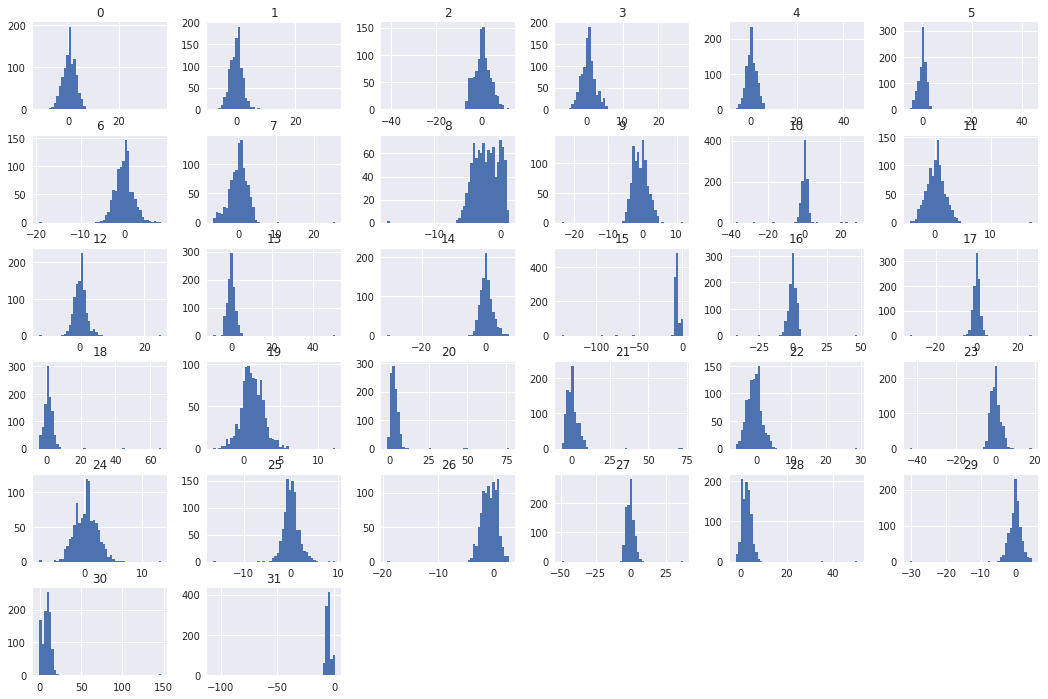

In [240]:
# seaborn.pairplot(netcla) # toto nie je dobry napad. Tych atributov je strasne vela a kazdy s kazdym je dost velka matica
# plt.rcParams['figure.figsize'] = 18, 12
_ = challenge_data.hist(figsize=(18, 12), bins=50)

Niektoré atribúty sa tvária, že sú z niečoho podobného normálnemu rozdeleniu, ale niektoré určite nie. Napríklad stĺpec s indexom 20

Skewness:  11.204489382533838


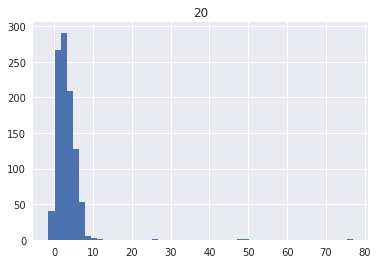

In [116]:
index = 20
pom = challenge_data[index].hist(bins=50)
pom.set_title(index)

import scipy.stats as stats
print('Skewness: ', stats.skew(challenge_data[index]))

Hodnota skewness je veľmi vysoká a kladná, to znamená, že rozdelenie nie je symetrické, ale je navážené doľava (k nízkym hodnotám). Je tam teda veľmi veľa nízkych hodnôt a stále menej a menej extrémne vysokých.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


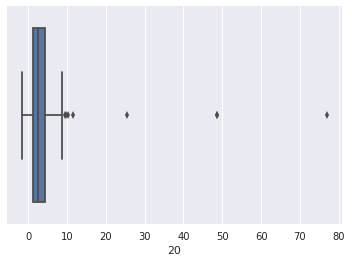

In [102]:
seaborn.boxplot(challenge_data[index])

Boxplot nám označil nejakých outlierov medzi vysokými hodnotami

Spočítajme si hodnotu pre fúzy. Všetky pozorovania mimo týchto hodnôt boli označené ako outlier

In [131]:
descr = challenge_data[index].describe()
whisker_r = descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))
whisker_r

descr = challenge_data[index].describe()
whisker_r = np.min([descr['max'], descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))])
whisker_l = np.max([descr['min'], descr['25%'] - (1.5 * (descr['75%'] - descr['25%']))])
whisker_l, whisker_r

(-1.5215626955032349, 8.652123291027412)

Ten ľavý fúz je vlastne minimum

In [103]:
challenge_data[20].min()

-1.5215626955032349

Koľko pozorovaní bolo označených ako outlier?

In [123]:
sum(challenge_data[20] > whisker_r)

8

Ľavý fúz je vlastne minimum, takže medzi malými hodnotami nie sú žiadni outliery

### Boxplot nie je dobrý na nesymetrické dáta. 
Skúsme si tie dáta trochu upraviť. Tak, aby boli symetrickejšie

Transformujme ich pomocou logaritmu.

Treba dat ale pozor na to, že nevieme spočítať logaritmus záporného čísla

Skewness: -0.09981990185102008


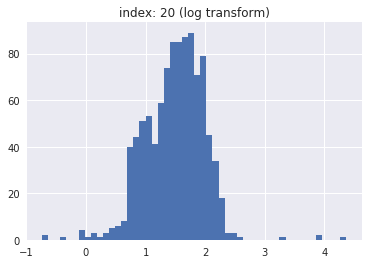

In [115]:
index = 20
transformed = np.log(challenge_data[index]+2) #posunme vsetky cisla tak aby sme nemali ziadne zaporne (Ked priratame +2, tak to bude viac ako dost)
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (log transform)" % index)
print("Skewness:", stats.skew(transformed))

Po transformácii je hodnota skewness oveľa bližšie k 0. Znamená to, ze rozdelenie je symetrickejšie.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


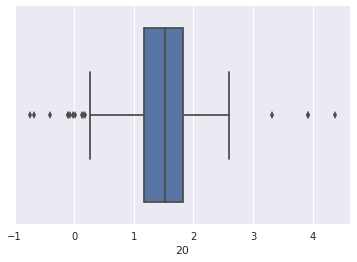

In [124]:
seaborn.boxplot(transformed)

Spočítajme si znovu tie fúzy

In [130]:
descr2 = (transformed).describe()
whisker2_r = np.min([descr2['max'], descr2['75%'] + (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l = np.max([descr2['min'], descr2['25%'] - (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l, whisker2_r

(0.20404823864545207, 2.798869737021752)

A koľko mame outlierov teraz?

In [132]:
sum(transformed > whisker2_r)

4

In [133]:
sum(transformed < whisker2_l)

11

Ak transformujeme dáta na niečo, čo sa viac podobá na normálne rozdelenie (hlavne na rozdelenie, ktoré je sústredené okolo nejakej strednej hodnoty), tak box plot nám nájde úplne iných kandidátov na outlierov. V pôvodnom rozdelení sme si vôbec nemuseli všimnúť, že nejaké extrémne hodnoty boli aj medzi malými hodnotami (blízkymi 0) pretože veľká váha rozdelenia bola posunutá k malým hodnotám.

Pri používaní box plotu, treba dať pozor na to aby bolo rozdelenie sústredené okolo nejakej strednej hodnoty. Pozor na nesymetrické rozdelenia.

Veľmi často sa používa Box-Cox transformácia. Robí niečo veľmi podobné ako logaritmus. Len nemusíte vy kontrolovať základ logaritmu, ale dokáže sa ho naučiť z dát. Viac info o tom, ako Box-Cox funguje, nájdete tu: http://onlinestatbook.com/2/transformations/box-cox.html

In [134]:
from scipy.stats import boxcox

0.031902697078064354


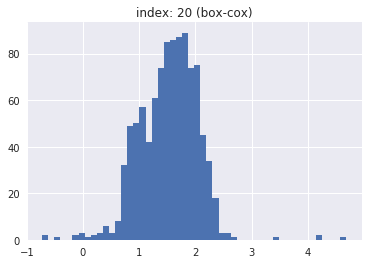

In [227]:
index = 20
transformed, att = boxcox(challenge_data[index]+2)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (box-cox)" % index)
print(att)

Ten parameter, ktorý to vrátilo je dôležitý. Treba si ho odložiť a pri transformovaní testovacích dát ho dať ako druhý parameter transformácie. Vtedy sa ho transformácia nebude učiť, ale použije tento. Vráti teda už len transformované dáta bez tohto parametru.

## Ďalšie normalizácie
Existuje celá skupina transformácii založených na násobení všetkých dát a odčítaní nejakej hodnoty.

* z-normalization
> Stredná hodnota bude 0 a štandardná odchýlka 1shift = mean, scale = std
* 0-1 normalization: shift = min, scale =  max - min
> všetky hodnoty budú v rozsahu 0-1, Pozor na to, že minimum a maximum sú veľmi nestabilné hodnoty. Veľmi ľahko sa môže stať, že v testovacích dátach príde menšie minimum alebo väčšie maximu. Vy nemôžete pretrénovať transformáciu na nových dátach. Výsledkom bude, že sa vám môžu objaviť hodnoty < 0 alebo > 1
* to isté ako 0-1 normalizácia robí StandardScaler v sklearn pre všetky atribúty v datasete naraz. Pozor ale na nesymetrické rozdelenia
* ak použijete RobustScaler, tak si viete poradiť aj s outliermi (používa rozsah 1st quartile (25th quantile) and the 3rd quartile (75th quantile)). Stabilnejšie, ale hodnoty mimo intervalu 0-1 sú bežné.


In [234]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

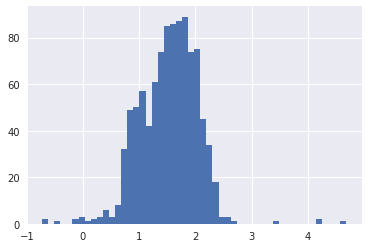

In [235]:
_ = plt.hist(transformed, bins=50)

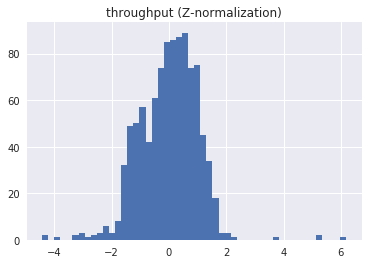

In [237]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
_ = plt.hist(z_transformed, bins=50)
plt.title('throughput (Z-normalization)')

zmenila sa nám stredná hodnota a štandardná odchýlka

Aj sklearn má už v sebe predpripravenú z-normalizáciu

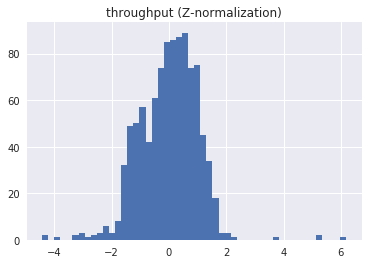

In [239]:
# sklearn.preprocessing
preprocessing.scale(transformed)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# Na čo okrem detekcie outlierov vôbec robíme normalizáciu?

Veľa algoritmov robí s numerickými dátami rôzne matematické operácie. Ak pracujú s extrémnymi hodnotami, tak môžu mat problémy.

Napríklad neurónová sieť by musela mať pre prácu s takýmito hodnotami veľmi veľké alebo veľmi malé váhy na hranách medzi neurónmi. Na to aby sa ich ale naučila zvyčajne nemá dostatok dát. Pri rozdeleniach veľmi navážených na jednu stranu nepomôže pridanie viac dát. Tie extrémne hodnoty sa vyskytujú až príliš zriedkavo a ostatné ich prebijú. Lepšie je tie dáta transformovať.

Podobne sú na tom aj váhy atribútov napríklad v lineárnej regresii. Ak by do nich prišla extrémna hodnota, tak aj výsledok predikcie pôjde veľmi rýchlo do extrémov.


# Transformácia numerických atribútov na kategorické - diskretizácia

Pre niektoré algoritmy číselne dáta nie sú úplne vhodné. Napríklad taký Naivný Bayes potrebuje kategorické hodnoty. Tie sa dajú vytvoriť zaradením numerických hodnôt do intervalov.

Intervaly sú buď manuálne nastavené, alebo také, aby ich šírka bola rovnaká (Equal width binning/discretization) alebo počty prvkov (Equal frequency binning/discretization), ktoré do nich spadajú boli približne rovnaké.


## Rovnaká šírka intervalov

In [246]:
bin_count = 10
bins = np.linspace(z_transformed.min(), z_transformed.max(), bin_count)
bins # toto su hranice intervalov binov. Intervaly su rovnako siroke

array([-4.42671654, -3.24692043, -2.06712432, -0.88732821,  0.29246791,
        1.47226402,  2.65206013,  3.83185624,  5.01165235,  6.19144847])

In [243]:
z_transformed[:10] # mala ukazka povodnych dat

array([ 0.10657099,  0.16580308,  0.8440961 , -1.24717423,  0.48185395,
       -0.55594854,  0.3699829 , -0.04235558, -1.22058166, -0.61991132])

In [268]:
ew_digitized = np.digitize(z_transformed, bins)
ew_digitized[:10] # Ukazka dat transfomrovanych na identifikatory binov

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 1])

<Container object of 9 artists>

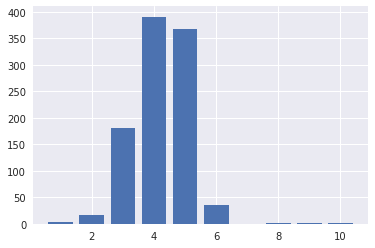

In [244]:
plt.bar(*np.unique(ew_digitized, return_counts=True))

Intervaly sú rovnako široké, ale početnosť pozorovaní v nich je veľmi rozdielna. Zachoval sa vlastne tvar toho pôvodného rozdelenia

Všimnite si, že už nepoužívame histogram, ale bar plot


Pri rovnako širokých intervaloch som rovnomerne rozdelil interval medzi maximálnou a minimálnou hodnotou. Nič mi nebráni definovať si vlastne, rôzne široké intervaly a spraviť z toho prístup používajúci manuálne definovane intervaly

Rôzne široké intervaly sa často používajú na zaradenie ľudí do vekových skupín: 0-15 deti, 15-18 tínedžeri, 18-25 mladí dospelí, 25-60 dospelí, 60+ seniori


## Rovnaká početnosť intervalov

Chceme, aby boli intervaly približne rovnako početné.


In [264]:
data = challenge_data[20] # tuna nepotrebujeme transformovat data, ale ak by sme, tak nam to nijak neprekaza

bin_count = 10
percentiles = np.linspace(0, 100, bin_count, endpoint = False)
percentiles # chceme vytvorit intervaly, kde v kazdom bude 10% dat. Cize toto su hranice pocetnosti intervalov

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [265]:
bins = list(map(lambda x: np.percentile(data, x), percentiles))
bins # takto z hranic pocetnosti spravime hranice hodnot

[-1.5215626955032349,
 0.3481952660537032,
 0.878680005317,
 1.5704484939575194,
 2.106584409165542,
 2.592609643936157,
 3.1949773599911797,
 3.8665801048278805,
 4.695518307476256,
 5.678778468091513]

In [266]:
ef_digitized = np.digitize(data, bins)
ef_digitized[:10] # takto transformujeme hodnoty na identifikatory intervalov

array([6, 6, 8, 2, 7, 3, 7, 5, 2, 3])

<Container object of 10 artists>

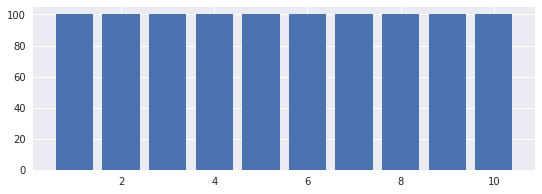

In [252]:
plt.bar(*np.unique(ef_digitized, return_counts=True))

Každý interval obsahuje teraz úplne rovnaký počet pozorovaní.

### Čo sa stane ak tú istú transformáciu pustíme na testovacích dátach?

<Container object of 11 artists>

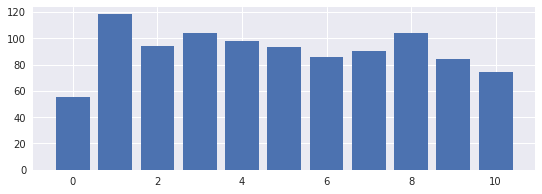

In [253]:
challenge_data_test = pd.read_csv("./data/x_test.csv", nrows=1000, sep=',', header=None)
test_data = challenge_data_test[20]

# nezmenim biny, cize pouzivam transformaciu, ktoru som natrenoval na trenovacich datach. Na toto si treba dat pozor. Nikdy transformaciu nemozem menit pre trenovacie a pre testovacie data
ef_digitized_test = np.digitize(test_data, bins)
plt.bar(*np.unique(ef_digitized_test, return_counts=True))

Teraz už tie početnosti nie sú úplne rovnomerné, ale to je len tým, že testovacie dáta nie sú úplne rovnaké ako trénovanie.

# Transformácia numerických dát na binárne

Toto je jednoduché, potrebujete si len zobrať nejakú hranicu a všetko, čo je pod ňou bude 0 a nad ňou 1


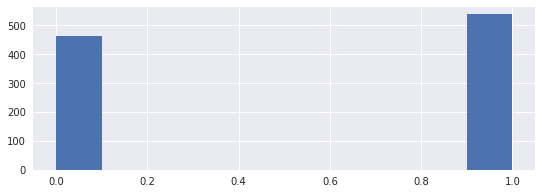

In [269]:
binarizer = preprocessing.Binarizer(0) # v tomto pripade je hranica 0
binary = binarizer.transform(z_transformed.reshape(1, -1))
pd.Series(binary[0]).hist()

# Transformácia kategorických údajov na numerické

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

https://github.com/wdm0006/categorical_encoding

https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

### Existuje viacero spôsobov ako transformovať kategorickú hodnotu na číslo 

1. Ordinal - priradzovanie čísel postupne rôznym hodnotám
2. One-hot - z každej kategórie vznikne stĺpec s hodnotou 1 v tých riadkoch, ktoré boli nastavené na túto hodnotu. inde 0
3. Binary - zoberie sa ordinal, zakódujú sa tie čísla ako binárne, každá číslica binárneho čísla je použitá ako stĺpec a tam kde bola na zodpovedajúcom mieste 1, tam bude v stĺpci 1 a inak 0
4. Sum - porovnáva sa priemer závislej premennej na riadkoch jednej skupiny oproti priemeru závislej premennej na celej dátovej sade
5. Helmert - veľmi podobne ako Sum, len jedinečnosť kategorickej hodnoty je daná inou kombináciou hodnôt
6. BackwardDifferenceEncoder - veľmi podobné ako Sum, len jedinečnosť kategorickej hodnoty je daná inou kombináciou hodnôt
7. Polynomial - trénuje koeficienty ploynomiálnej regresie rôzneho stupňa, ktoré sa dajú použiť na regresiu závislej premennej (neviem aký to ma zmysel pre malý počet rôznych hodnôt) (treba ordinálne premenné)
8. Hash - zahashuje string kategorickej premennej a moduluje ho počtom rôznych hodnôt. Je v sklearn http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
9. V ostatnej dobe sú veľmi populárne tzv. Embeddingy. Reprezentácia naučená pomocou neurónovej siete.

Zaujímavé sú teraz asi len prvé 4, číslo 7 a 9, ostatné sú len obmeny týchto s tým, že menia rozdelenia hodnôt


In [254]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [255]:
# pip install category_encoders
import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# encoder = ce.BinaryEncoder()
# encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
encoder = ce.OneHotEncoder() # tento je aj v sklearn.preprocessing.OneHotEncoder, tu su ale vsetky a maju rovnaky predpis
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()

In [256]:
# odstranime chybajuce hodnoty
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
titanic_y = titanic.dropna().reindex(columns=['Survived'])

In [257]:
# Zakodujeme kategoricke data
encoder.fit(titanic_X, titanic_X.Fare)
titanic_categorical = encoder.transform(titanic_X)
titanic_categorical.head()

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,...,Embarked_0,Embarked_1,Embarked_2,Embarked_-1,PassengerId,Pclass,Age,SibSp,Parch,Fare
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,1,38.0,1,0,71.2833
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,4,1,35.0,1,0,53.1000
6,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,7,1,54.0,0,0,51.8625
10,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,11,3,4.0,1,1,16.7000
11,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,12,1,58.0,0,0,26.5500


Toto sme asi úplne nechceli. Treba si dávať pozor na to koľko rôznych hodnôt má kategorická premenná. Tu sme sa pokúsili zakódovať meno, ktoré má veľmi veľa unikátnych hodnôt a teda nám vzniklo veľmi veľa rôznych stĺpcov. Vo všeobecnosti to nie je dobrý nápad

# Čo si zobrať z dnešnej prezentácie


1. To ako riešiť problém chýbajúcich hodnôt závisí od procesu ich vzniku. Niekedy to ani nejde.

2. Existuje veľa stratégií ako dopĺňať chýbajúce hodnoty. Odstránenie pozorovania by mala byť až tá posledná možnosť.

3. Pri detekcii outlierov vám rôzne vizualizačné metódy dávajú len návrhy, čo by mohol byť outlier. Vždy sa poriadne zamyslite a pozrite sa na rozdelenie dát.

4. Normalizácia údajov vám môže veľmi pomôcť nie len pri detekcií outlierov, ale aj pri samotnom trénovaní algoritmov.

5. Pri nahrádzaní outlierov postupujte podobne ako pri chýbajúcich hodnotách.

6. Ako transformovať dáta medzi rôznymi formami. 

7. Aké problémy môže spôsobiť transformácia kategorického atribútu jednoduchým priradením čísel od 0 do počtu unikátnych hodnôt?

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w06